In [0]:
#########################################################
# 1. Make sure select GPU type in colab (Runting->Change Run Type -> GPU)
# 2. Make sure upload belowing file before run
# models.py torch_utils.py helper.py preprocess.pkl

In [0]:
import helper
import numpy as np
import torch
import torch.nn as nn
from torch_utils import batch_data, train_rnn
from models import RNN, Vanilla, GRU
import time
import os
import matplotlib.pyplot as plt

# hyperparameters
# 3 , 5 ,7 
sequence_length = 3
batch_size = 128
num_epochs = 10
learning_rate = 0.002
embedding_dim = 256
hidden_dim = 256
n_layers = 2
show_every_n_batches = 500

In [3]:
import os
import importlib
importlib.reload(helper)

<module 'helper' from '/content/helper.py'>

In [0]:
# load data
int_text, vocab_to_int, int_to_vocab, token_dict = helper.load_preprocess()
train_loader = batch_data(int_text, sequence_length, batch_size)
vocab_size = len(vocab_to_int)
output_size = len(vocab_to_int)



In [0]:
# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')



In [0]:
# create model and move to gpu if available
rnn = RNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, dropout=0.25)
# rnn = GRU(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, dropout=0.25)
# rnn = Vanilla(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, dropout=0.5)

if train_on_gpu:
    rnn.cuda()

Training for 10 epoch(s)...
epoch  1
Epoch:    1/10    Loss: 5.731341509819031 Decrease Rate: inf 

Model Trained and Saved
Epoch:    1/10    Loss: 5.10640493106842 Decrease Rate: 0.6249365787506109 

Model Trained and Saved
Epoch:    1/10    Loss: 4.956127104759216 Decrease Rate: 0.15027782630920417 

Model Trained and Saved
Epoch:    1/10    Loss: 4.860076190948487 Decrease Rate: 0.09605091381072928 

Model Trained and Saved
Epoch:    1/10    Loss: 4.77908082485199 Decrease Rate: 0.08099536609649682 

Model Trained and Saved
Epoch:    1/10    Loss: 4.726257808208466 Decrease Rate: 0.05282301664352396 

Model Trained and Saved
Epoch:    1/10    Loss: 4.685904870986938 Decrease Rate: 0.04035293722152744 

Model Trained and Saved
Epoch:    1/10    Loss: 4.650027208805084 Decrease Rate: 0.0358776621818544 

Model Trained and Saved
Epoch:    1/10    Loss: 4.602498248577118 Decrease Rate: 0.047528960227966266 

Model Trained and Saved
Epoch:    1/10    Loss: 4.583962023258209 Decrease Rate

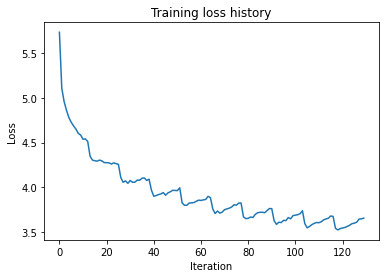

In [7]:
# set decay, optimizer, and loss
decay_rate = learning_rate / num_epochs
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate, momentum=0.9, weight_decay=decay_rate)
criterion = nn.CrossEntropyLoss()

# train the model
saved_model_name = 'trained_lstm_sq_3'
trained_rnn, loss_history = train_rnn(rnn, batch_size, optimizer, criterion, num_epochs, train_loader, show_every_n_batches, saved_model_name)

plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()
